Grupo 9
Dámaso Sánchez Arenas
Eduardo Rodríguez de Castro Zaloña

In [ ]:
import sklearn
from sklearn.datasets.california_housing import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pr
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score

## CARGA y PREPARACIÓN DE DATOS 

In [27]:
houses = fetch_california_housing()

In [28]:
houses.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

Los datos estan representados como un diccionario con las siguientes llaves:

- __data__: Contiene los datos númericos para cada bloque. Representado como un array donde cada elemento es un array de                    elementos
- __target__: Mediana  del precio de las viviendas en el bloque en cuestión
- __feature_names__: Son los nombres que caracterizan los elementos del array, de cada individuo del conjunto de datos
- __DESCR__: Descripción del conjunto de datos

Los datos contienen bloques de habitantes caracterizados por las variables (feature_names), lo que queremos es agrupar los bloques por características
    

In [29]:
houses.feature_names #Nombres de las variables todas son de tipo númerico y hay tanto números discretos como continuos (Cuantitativas)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [30]:
df = pd.DataFrame(data=houses['data'], columns=houses['feature_names']) 
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [31]:
df.dtypes #Como hemos dicho son todos de tipo númerico, más concretamente float64

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [32]:
clean_data = df.drop(['Latitude','Longitude'],axis=1) #Quitamos estos dos features para hacer el clustering
clean_data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467

## DESCRIPCIÓN y PRIMERAS CONCLUSIONES

Estadísticos descriptivos para las variables de nuestro dataSet sin latitud y longitud que no las tendremos en cuenta para hacer los clusters.
Estos datos nos dan una idea de como estan distribuidos los datos con los percentiles. Podemos ver los dos extremos de las variables (min,max) y la media. Ahora haremos unos cuantos gráficos para poderlo visualizar mucho mejor y sacar más conclusiones.

In [33]:
clean_data.describe() 

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup  
count  20640.000000  
mean       3.070655  
std       10.386050  
min        0.692308  
25%        2.429741  
50%        2.818116  
75%        3.282261  
max     1243.333333

### DISTRIBUCIONES

C:\Users\eduvo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


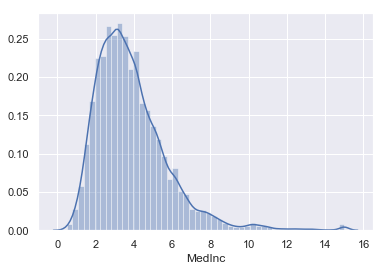

In [34]:
sns.set(color_codes=True)
sns.distplot(clean_data['MedInc'])

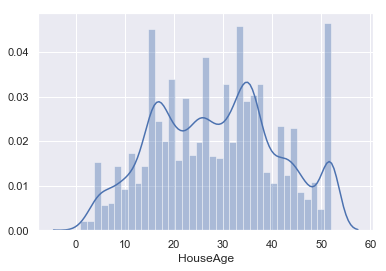

In [35]:
sns.distplot(clean_data['HouseAge'])

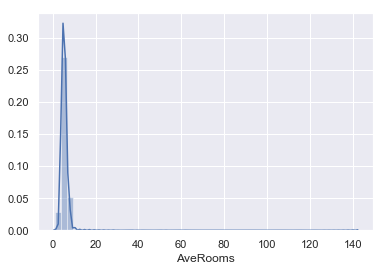

In [36]:
sns.distplot(clean_data['AveRooms'])

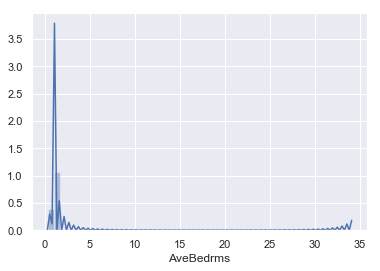

In [37]:
sns.distplot(clean_data['AveBedrms'])

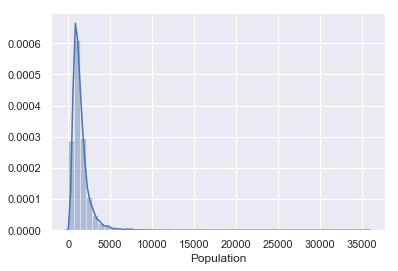

In [38]:
sns.distplot(clean_data['Population'])

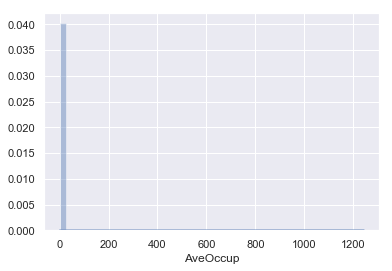

In [39]:
sns.distplot(clean_data['AveOccup'])

### CORRELACIÓN

Podemos ver en el grafico de abajo que no hay casi correlación entre las variables menos entre AveRooms y AveBedrms. Además de estas dos variables está un poco relacionado las habitaciones con los ingresos medios lo cual tiene bastante sentido.

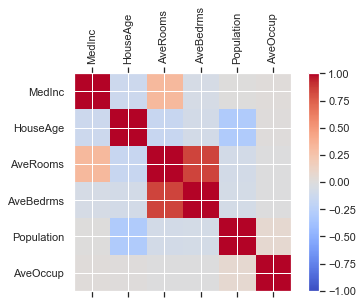

In [40]:
correlation = clean_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(clean_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(clean_data.columns)
ax.set_yticklabels(clean_data.columns)
plt.show()

#### CONCLUSIONES DISTRIBUCIÓN y CORRELACIÓN

En los histogramas vemos más claramente lo que los estadísticos descriptivos nos han dicho:

- __MedInc__ tiene los datos en una distribución normal con un ajuste adecuado y se ve que hay más frecuencia cerca de la media, 3.8
- Los datos de __HouseAge__ son multimodales porque tienen más de un pico y entonces por eso los vemos menos compactados. Eso significa que los valores con más frequencia están esparcidos por el conjunto de datos
- En __AveRooms__ y en __AveBedrms__ es notable la diferencia entre el mínimo y el máximo valor del conjunto de datos
- En __Population__ también hay una gran diferencia entre los extremos pero los datos están algo mejor distribuidos. Lo podemos ver por la diferencia entre los valores de los percentiles y el máximo
- __AveOccup__ tiene mucha diferencia entre el min y el max. Tiene los datos mayoritariamente entre 0-3.2 y luego el máximo bastante alejado con 1243, lo que podría ser un outlier

Creemos que de al ver la correlación de las variables podríamos juntar las variables __AveRooms__ y __AveBedrms__ porque están fuertemente relacionadas y no afectaría juntarlas en una o incluso eliminar una de ellas porque miden la misma característica


# RE-ESCALADO 

Hemos pensado que es buena idea re-escalar porque hay valores muy grandes que podrían tener bastante influencia en el resultado. Al ser diferentes magnitudes entre features creemos que conviene re-escalar para así normalizar el conjunto de datos
Utilizaremos la función de la librería sklearn que se encarga de estandarizar un dataframe

In [41]:
scale_array = pr.scale(clean_data)
scale_data = pd.DataFrame(scale_array,columns=clean_data.columns)
scale_data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616

In [42]:
scale_data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   3.734255e-16  8.557001e-16  2.704111e-16 -1.531384e-16 -6.465442e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.774299e+00 -2.196180e+00 -1.852319e+00 -1.610768e+00 -1.256123e+00   
25%   -6.881186e-01 -8.453931e-01 -3.994496e-01 -1.911716e-01 -5.638089e-01   
50%   -1.767951e-01  2.864572e-02 -8.078489e-02 -1.010650e-01 -2.291318e-01   
75%    4.593063e-01  6.643103e-01  2.519615e-01  6.015869e-03  2.644949e-01   
max    5.858286e+00  1.856182e+00  5.516324e+01  6.957171e+01  3.025033e+01   

           AveOccup  
count  2.064000e+04  
mean   6.064808e-19  
std    1.000024e+00  
min   -2.290000e-01  
25%   -6.171062e-02  
50%   -2.431585e-02  
75%    2.037453e-02  
max    1.194191e+02

# CLUSTERING

Veremos que entre uno y un número máximo de clusters cual será el valor más acertado según los gráficos que salgan y una gráfica donde se mostrará para que número de clusters es mejor nuestro modelo.

In [112]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()


In [128]:
clean_array = np.array(clean_data) #Transformamos el dataframe a un array

Con los datos sin normalizar

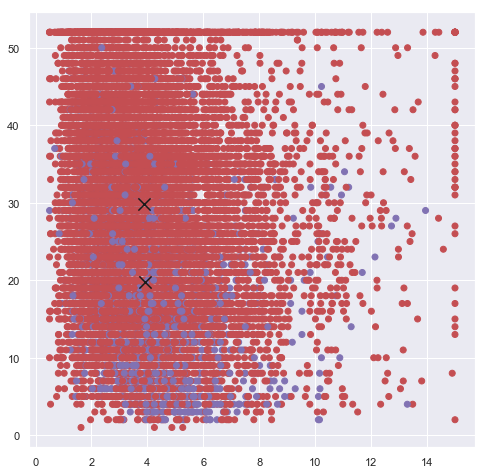

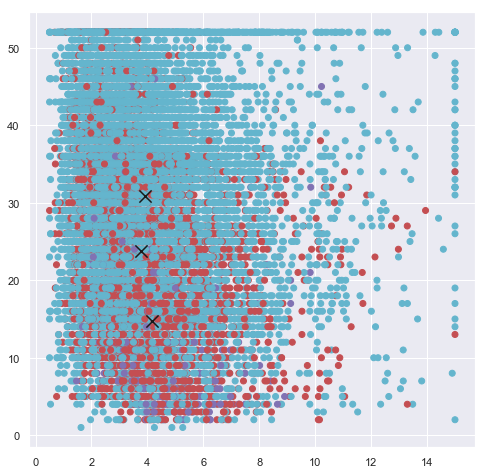

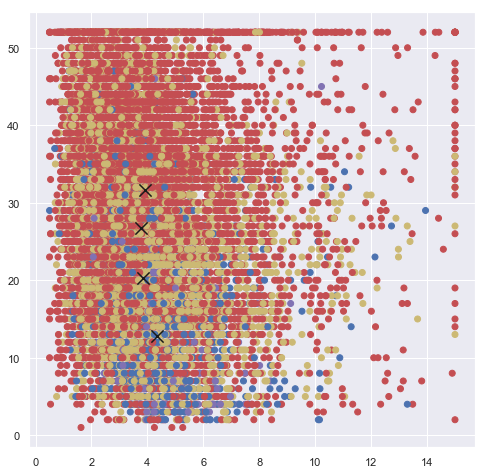

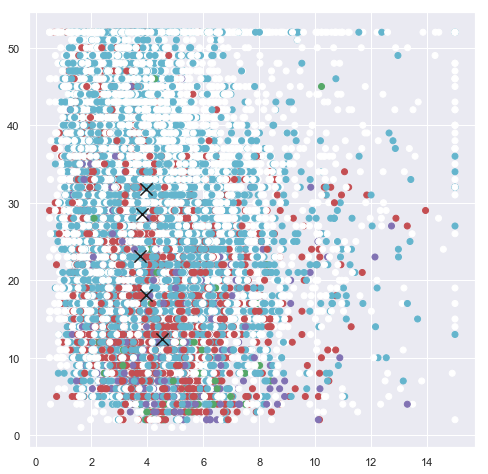

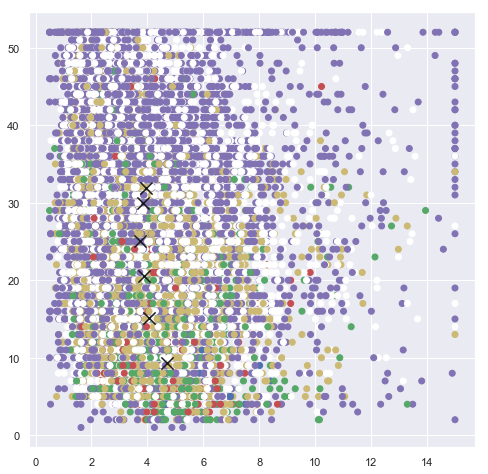

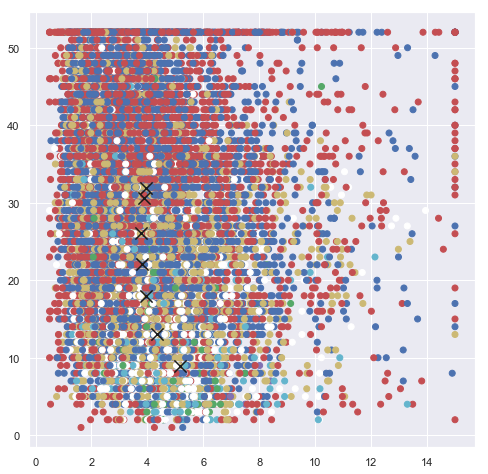

In [136]:
K_MAX = 8
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k)
    km.fit(clean_array)
    plot_clusters(clean_array, km.labels_, km.cluster_centers_)
    
    silhouette[k-2] = silhouette_score(clean_array, km.labels_) 

Text(0.5, 1.0, 'Valor de Silhouette para diferentes k')

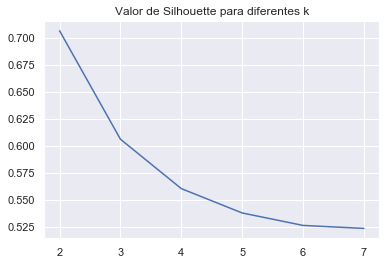

In [137]:
plt.plot(range(2, K_MAX), silhouette)
plt.title('Valor de Silhouette para diferentes k')

Con los datos re-escalados

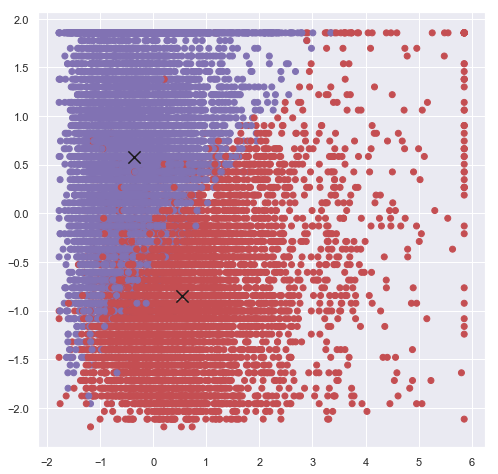

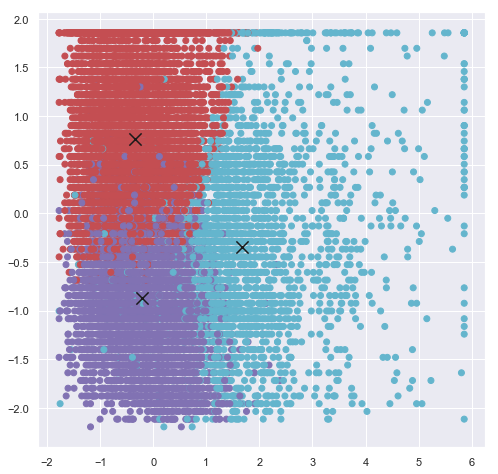

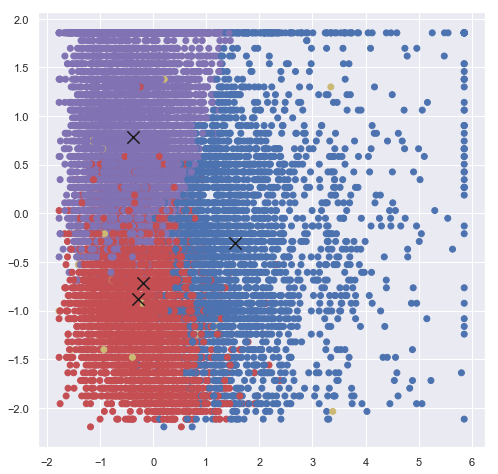

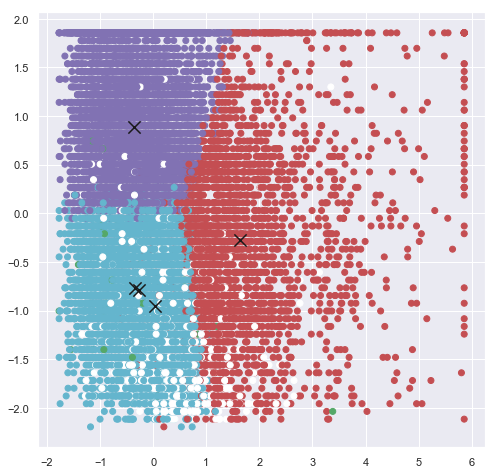

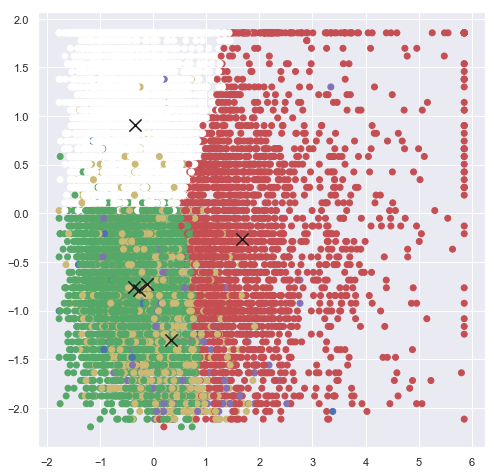

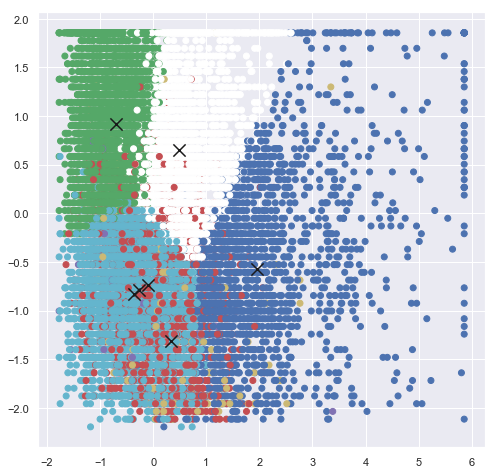

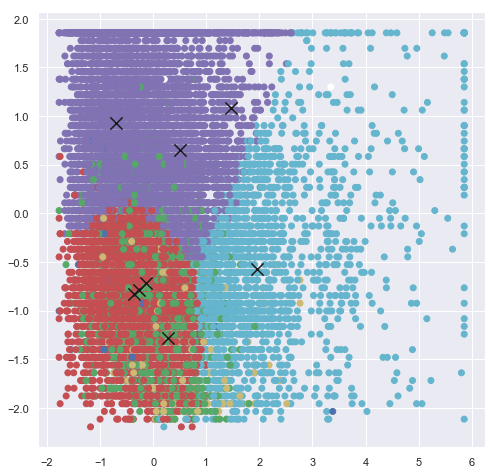

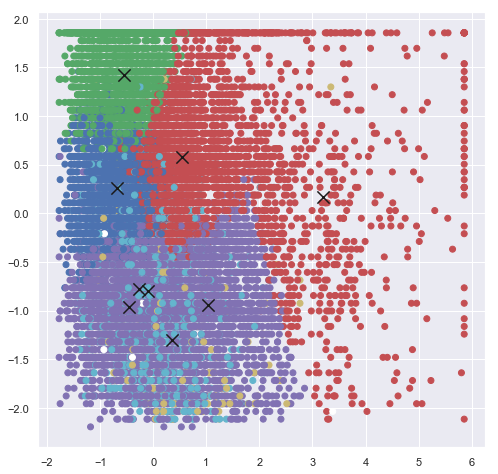

In [138]:
K_MAX = 10
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k)
    km.fit(scale_array)
    plot_clusters(scale_array, km.labels_, km.cluster_centers_)
    
    silhouette[k-2] = silhouette_score(scale_array, km.labels_) 

Text(0.5, 1.0, 'Valor de Silhouette para diferentes k')

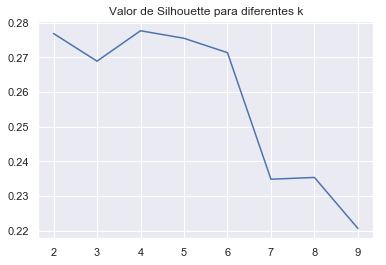

In [139]:
plt.plot(range(2, K_MAX), silhouette)
plt.title('Valor de Silhouette para diferentes k')

KMeans con 2 clusters. Hemos escogido 2 clusters para los datos sin escalar porque ha dado el valor más alto en la gráfica

In [143]:
kmeans = KMeans(init = 'random',n_clusters=2).fit(clean_array)
kmeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

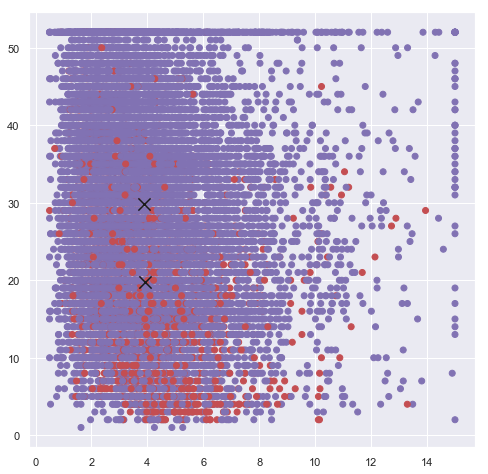

In [144]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plot_clusters(clean_array, labels, centroids)

KMeans con 4 clusters. Hemos escogido 4 clusters para los datos escalados porque ha dado el valor más alto en la gráfica

In [148]:
kmeans = KMeans(init = 'random',n_clusters=4).fit(scale_array)
kmeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

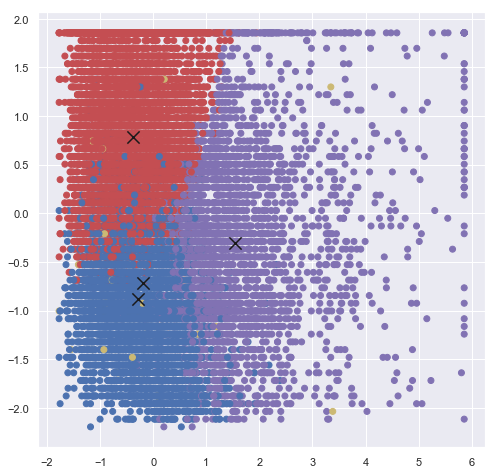

In [149]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plot_clusters(scale_array, labels, centroids)